In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request

In [2]:
import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/no_nan_qna_set.csv', index_col=0)
# df = pd.read_table('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/moonee_qna_set.txt', sep=',', index_col=0)
df = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/qna_for_git.csv', index_col=0)

# df.head()

In [3]:
sub_type_mapping = {
    'type_1': 0,
    'type_2': 1,
    'type_3': 2,
    'type_4': 3,
    'type_5': 4,
    'type_6': 5,
    'type_7': 6,
    'type_8': 7,
    'type_9': 8,
    'type_10': 9,
    'type_11': 10,
    'type_12': 11,
    'type_13': 12,
    'type_14': 13,
    'type_15': 14,
    'type_16': 15,
    'type_17': 16,
    'type_18': 17,
    'type_19': 18,
    'type_20': 19,
    'type_21': 20
}

func = lambda x: sub_type_mapping.get(x, x)

In [4]:
df['sub_type'] = df['sub_type'].map(func)

In [5]:
from sklearn.model_selection import train_test_split

# train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=930)

In [6]:
# drop=True 안 하면 index 열 안 사라짐
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [7]:
train_data.sub_type.nunique(), test_data.sub_type.nunique()

(21, 21)

In [8]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 개수 출력
print('테스트용 리뷰 개수 :',len(test_data)) # 테스트 개수 출력

훈련용 리뷰 개수 : 4668
테스트용 리뷰 개수 : 1168


In [9]:
# train_data[:5] # 상위 5개 출력

In [10]:
# test_data[:5]

In [11]:
train_data['inquiry'].nunique(), train_data['sub_type'].nunique()

(3922, 21)

In [12]:
### 일부러 스킵
# train_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

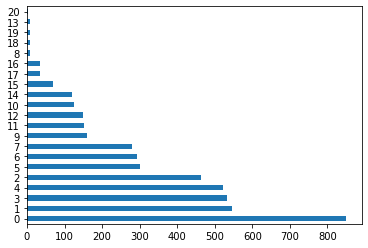

In [14]:
train_data['sub_type'].value_counts().plot(kind = 'barh')

In [13]:
print(train_data.groupby('sub_type').size().reset_index(name = 'count'))

    sub_type  count
0          0    849
1          1    545
2          2    464
3          3    532
4          4    521
5          5    300
6          6    293
7          7    280
8          8      9
9          9    160
10        10    125
11        11    153
12        12    150
13        13      8
14        14    121
15        15     70
16        16     34
17        17     36
18        18      8
19        19      8
20        20      2


In [14]:
print(test_data.groupby('sub_type').size().reset_index(name = 'count'))

    sub_type  count
0          0    209
1          1    130
2          2    119
3          3    140
4          4    121
5          5     89
6          6     75
7          7     68
8          8      2
9          9     20
10        10     33
11        11     37
12        12     49
13        13      5
14        14     21
15        15     20
16        16     12
17        17     12
18        18      2
19        19      2
20        20      2


In [15]:
print(train_data.isnull().values.any())

False


## 토크나이저를 이용한 정수 인코딩

In [18]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.0 MB/s 
     |████████████████████████████████| 6.6 MB 47.8 MB/s 
     |████████████████████████████████| 596 kB 54.9 MB/s 
     |████████████████████████████████| 101 kB 12.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [16]:
import transformers

transformers.__version__

'4.20.1'

In [17]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base")

In [18]:
test_data = test_data.dropna(how='any')

In [19]:
print(len(test_data))

1168


In [20]:
X_train_list = train_data['inquiry'].tolist()
X_test_list = test_data['inquiry'].tolist()
y_train = train_data['sub_type'].tolist()
y_test = test_data['sub_type'].tolist()

In [21]:
X_train = tokenizer(X_train_list, truncation=True, padding=True)
X_test = tokenizer(X_test_list, truncation=True, padding=True)

In [22]:
# print(X_train[0].tokens)

In [23]:
print(X_train[0].ids)

[2, 9926, 4318, 3915, 6233, 1506, 2372, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [24]:
print(X_train[0].type_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


type_ids는 지금 풀고자 하는 문제에서 문장의 종류의 개수를 의미하는데, 일반적으로 두 개 이상의 문장을 가지고 푸는 문제일 경우에는 [0, 0, 0, 0, 1, 1, 1, 1] 이런 식의 값이 들어가지만 네이버 영화 리뷰는 문장 1개를 보고 푸는 문제라서 [0, 0, 0, 0, 0, 0, 0, 0]이 들어간다.

In [25]:
print(X_train[0].attention_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 데이터셋 생성 및 모델 학습

In [26]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train),
    y_train
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test),
    y_test
))

In [27]:
from transformers import TFBertForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [32]:
# loss = model.compute_loss
# loss = tf.keras.losses.CategoricalCrossentropy()

### 여기서, Kobert 시도

In [33]:
pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-_yi6fti3
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-_yi6fti3
     |████████████████████████████████| 132 kB 5.1 MB/s 
     |████████████████████████████████| 344 kB 39.7 MB/s 
     |████████████████████████████████| 49.1 MB 1.2 MB/s 
     |████████████████████████████████| 4.5 MB 55.0 MB/s 
     |████████████████████████████████| 1.2 MB 56.3 MB/s 
     |████████████████████████████████| 8.9 MB 41.2 MB/s 
     |████████████████████████████████| 79 kB 9.2 MB/s 
     |████████████████████████████████| 127 kB 71.7 MB/s 
  Created wheel for kobert: filename=kobert-0.2.3-py3-none-any.whl size=15674 sha256=f8ac52f8906b14f9efff08fa26fd66ad31d4121bdd455ccfb838aa7b2a06f28a
  Stored in directory: /tmp/pip-ephem-wheel-cache-g4ro3hvk/wheels/d3/68/ca/3347

In [34]:
!git clone https://github.com/SKTBrain/KoBERT.git
!cd KoBERT
!pip install -r requirements.txt

Cloning into 'KoBERT'...
remote: Enumerating objects: 425, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 425 (delta 130), reused 108 (delta 108), pack-reused 273
Receiving objects: 100% (425/425), 220.92 KiB | 6.31 MiB/s, done.
Resolving deltas: 100% (218/218), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [29]:
import torch
from kobert import get_pytorch_kobert_model

input_ids = torch.LongTensor([[31, 51, 99], [15, 5, 0]])
input_mask = torch.LongTensor([[1, 1, 1], [1, 1, 0]])
token_type_ids = torch.LongTensor([[0, 0, 1], [0, 1, 0]])
model, vocab  = get_pytorch_kobert_model()

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [30]:
# from_pt=True: 파이토치에서 학습된 모델인데 tf에서 쓰게 하기 위해
model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=21, from_pt=True)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
a = {}
a['안녕'] = list(1)
print(a)

In [ ]:
a['안녕'].append(str(2))

In [ ]:
a = print('안녕')

In [ ]:
a

In [ ]:
a['c'] = '123'
a['b'] = '4565'
a['a'] = '5222'
print(a)

In [ ]:
a = ['1','2','3','4','5','6','7']
' '.join(a)

In [ ]:
a = {'b': '4565', 'c': '123', 'a': '454'}
print(a)

In [ ]:
a.keys()

In [ ]:
a.items()

In [ ]:
sorted(a.items())

In [31]:
# model.compute_loss

In [32]:
callback_earlystop = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=2)

model.fit(
    train_dataset.shuffle(10000).batch(32), epochs=5, batch_size=64,
    validation_data = val_dataset.shuffle(10000).batch(64),
    callbacks = [callback_earlystop]
)

Epoch 1/5
146/146 [==============================] - 218s 1s/step - loss: 3.5591 - accuracy: 0.0499 - val_loss: 3.0445 - val_accuracy: 0.0531
Epoch 2/5
146/146 [==============================] - 194s 1s/step - loss: 3.0566 - accuracy: 0.0330 - val_loss: 3.0445 - val_accuracy: 0.0445
Epoch 3/5
146/146 [==============================] - 194s 1s/step - loss: 3.0445 - accuracy: 0.0401 - val_loss: 3.0445 - val_accuracy: 0.0445


In [33]:
model.evaluate(val_dataset.batch(1024))

2/2 [==============================] - 8s 990ms/step - loss: 3.0445 - accuracy: 0.0445


[3.044522523880005, 0.0445205494761467]

### **모델 저장**

In [34]:
model_path = '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/kobert-base'

model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/kobert-base/tokenizer_config.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/kobert-base/special_tokens_map.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/kobert-base/vocab.txt',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/kobert-base/added_tokens.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/kobert-base/tokenizer.json')

### **모델 로드 및 테스트**

In [35]:
from transformers import TextClassificationPipeline

# 로드하기
loaded_tokenizer = BertTokenizerFast.from_pretrained(model_path)
loaded_model = TFBertForSequenceClassification.from_pretrained(model_path)

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='tf',
    return_all_scores=True
)

Some layers from the model checkpoint at /content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/kobert-base were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/kobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSe

In [ ]:
# test_data

In [36]:
text_classifier('네비게이션이 안 돼요.')[0]

{'label': 'LABEL_0', 'score': 0.02949054166674614}

In [40]:
# 정렬 함수

# # 맨 처음에 만든 sub_type_mapping 뒤집기 -> dic.get() 함수 쓰기 위해
sub_type_mapping_reverse = {v: k for k, v in sub_type_mapping.items()}

def get_category_name_new(sentence):
    num = len(text_classifier(sentence))

    rank = {}
    for i in range(num):
        rank[i] = text_classifier(sentence)[i]['score']
    
    sorted_rank = dict(sorted(rank.items(), reverse=True, key=lambda x: x[1]))

    for key, value in sorted_rank.items():
        print(sub_type_mapping_reverse.get(key), '  ', value)

In [41]:
get_category_name_new('네비게이션이 안 돼요.')

type_7    0.06557101756334305
type_12    0.0646531879901886
type_9    0.06275367736816406
type_3    0.06114973872900009
type_11    0.06055012345314026
type_8    0.05668548494577408
type_17    0.05624634027481079
type_14    0.053390514105558395
type_21    0.05287649855017662
type_20    0.0518941693007946
type_10    0.05187869071960449
type_16    0.04852202534675598
type_19    0.04810909926891327
type_4    0.04557005316019058
type_2    0.044764138758182526
type_5    0.04410702735185623
type_18    0.04104354605078697
type_13    0.029874857515096664
type_1    0.02949054166674614
type_15    0.025109222158789635
type_6    0.0057600149884819984


In [42]:
get_category_name_new('타이어가 펑크났어요.')

type_9    0.0647025927901268
type_7    0.06412559747695923
type_3    0.06326019763946533
type_12    0.06316716969013214
type_11    0.059420548379421234
type_8    0.057439614087343216
type_17    0.055289171636104584
type_14    0.054124586284160614
type_21    0.05196278169751167
type_10    0.05151566490530968
type_20    0.05095599964261055
type_16    0.047508928924798965
type_19    0.04697317257523537
type_4    0.046411070972681046
type_2    0.045856740325689316
type_5    0.04444678872823715
type_18    0.0427592396736145
type_13    0.0302472785115242
type_1    0.029021216556429863
type_15    0.024914035573601723
type_6    0.005897550843656063


In [43]:
get_category_name_new('주차 딱지가 붙었는데 어떡하죠?')

type_7    0.06469794362783432
type_9    0.06362606585025787
type_3    0.062345825135707855
type_12    0.06128596514463425
type_11    0.060746997594833374
type_17    0.05744621902704239
type_21    0.05581232160329819
type_8    0.05488354712724686
type_14    0.05479957535862923
type_10    0.05119916796684265
type_20    0.04934670031070709
type_16    0.04849729314446449
type_19    0.04661308974027634
type_4    0.046145111322402954
type_2    0.04591170325875282
type_5    0.044716186821460724
type_18    0.042681291699409485
type_1    0.03037499077618122
type_13    0.029487093910574913
type_15    0.0236293226480484
type_6    0.005753681529313326


In [44]:
get_category_name_new('자동차 전기 충전이 안 돼요 ㅠㅠ')

type_7    0.06424128264188766
type_12    0.06362723559141159
type_3    0.062044259160757065
type_9    0.06186642497777939
type_11    0.060320813208818436
type_17    0.057331811636686325
type_21    0.05665690079331398
type_14    0.05491790175437927
type_10    0.05326363444328308
type_8    0.05324237048625946
type_20    0.05053452029824257
type_2    0.04792823642492294
type_16    0.04751232638955116
type_19    0.04708416387438774
type_4    0.046679817140102386
type_5    0.04625314474105835
type_18    0.041878003627061844
type_1    0.02842148207128048
type_13    0.027183206751942635
type_15    0.02338176593184471
type_6    0.005630722735077143


In [45]:
get_category_name_new('충전기 ')

type_12    0.06602152436971664
type_7    0.06551629304885864
type_11    0.06543881446123123
type_9    0.06517769396305084
type_3    0.06105881929397583
type_17    0.06045674905180931
type_8    0.05296879634261131
type_19    0.051961757242679596
type_20    0.05058897286653519
type_14    0.050296518951654434
type_21    0.04916544631123543
type_10    0.048826996237039566
type_16    0.04597732052206993
type_4    0.045845843851566315
type_2    0.04581664875149727
type_5    0.04307191073894501
type_18    0.04243507981300354
type_13    0.029824284836649895
type_1    0.029077624902129173
type_15    0.025071989744901657
type_6    0.00540093332529068


In [46]:
get_category_name_new('라이트가 안들어와요')

type_12    0.07011470943689346
type_7    0.06593374162912369
type_3    0.061713676899671555
type_9    0.060115210711956024
type_17    0.057909198105335236
type_11    0.057697270065546036
type_14    0.056178200989961624
type_10    0.05355651304125786
type_21    0.05274137854576111
type_8    0.052417125552892685
type_20    0.04914610832929611
type_4    0.04879384860396385
type_19    0.04858256131410599
type_2    0.04722552001476288
type_16    0.044059544801712036
type_5    0.042469147592782974
type_18    0.04140506684780121
type_13    0.030312946066260338
type_1    0.027762338519096375
type_15    0.02640906535089016
type_6    0.005456823855638504
